# Decision Tree Classification

In [23]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
DF = pd.read_csv("dataset_zoo.csv") # Load dataset
DF

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
87,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
88,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
89,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [18]:
DF.shape #return (columns,rows)

(91, 17)

In [3]:
DF.info() #return data type and number of non-null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        91 non-null     int64
 1   feathers    91 non-null     int64
 2   eggs        91 non-null     int64
 3   milk        91 non-null     int64
 4   airborne    91 non-null     int64
 5   aquatic     91 non-null     int64
 6   predator    91 non-null     int64
 7   toothed     91 non-null     int64
 8   backbone    91 non-null     int64
 9   breathes    91 non-null     int64
 10  venomous    91 non-null     int64
 11  fins        91 non-null     int64
 12  legs        91 non-null     int64
 13  tail        91 non-null     int64
 14  domestic    91 non-null     int64
 15  catsize     91 non-null     int64
 16  class_type  91 non-null     int64
dtypes: int64(17)
memory usage: 12.2 KB


In [19]:
DF.describe()   # return data summary (Count, Mean, Standard Deviation, Minimum Value, 25th Percentile,
                                    #        50th Percentile (Median), 75th Percentile, Maximum Value)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.428571,0.197802,0.571429,0.417582,0.230769,0.340659,0.549451,0.604396,0.824176,0.802198,0.087912,0.164835,2.846154,0.747253,0.142857,0.450549,2.802198
std,0.497613,0.400549,0.497613,0.495893,0.423659,0.476557,0.500305,0.491689,0.382780,0.400549,0.284736,0.373087,2.054389,0.436995,0.351866,0.500305,2.109343
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.500000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
DF.skew(axis = 0) #return skewness of each column

hair          0.293536
feathers      1.542826
eggs         -0.293536
milk          0.339870
airborne      1.299539
aquatic       0.683744
predator     -0.202124
toothed      -0.434183
backbone     -1.731862
breathes     -1.542826
venomous      2.959574
fins          1.837085
legs          0.156767
tail         -1.157034
domestic      2.075613
catsize       0.202124
class_type    0.876804
dtype: float64

# Note: skewness
Skewness, in statistics, is the degree of distortion from the symmetrical bell curve in a probability distribution. Distributions can exhibit right (positive) skewness or left (negative) skewness to varying degrees. Data lean to the left is positive vs. lean to the right is negative

In [14]:
DF.corr() #return correlation between columns

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000000,-0.430037,-0.820513,0.887685,-0.210819,-0.435077,-0.108388,0.518999,0.225000,0.430037,-0.112028,-0.265044,0.380409,0.094893,0.217571,0.420801,-0.585236
feathers,-0.430037,1.000000,0.430037,-0.420464,0.644691,-0.124093,-0.104798,-0.613769,0.229353,0.246575,-0.154163,-0.220604,-0.205656,0.288791,0.033787,-0.116984,-0.189893
eggs,-0.820513,0.430037,1.000000,-0.932712,0.368932,0.341368,-0.025503,-0.655237,-0.341667,-0.374291,0.112028,0.145347,-0.228245,-0.248182,-0.154113,-0.465431,0.659336
milk,0.887685,-0.420464,-0.932712,1.000000,-0.358008,-0.326536,0.005414,0.639482,0.391096,0.420464,-0.262881,-0.135952,0.216453,0.236084,0.163745,0.532009,-0.727459
airborne,-0.210819,0.644691,0.368932,-0.358008,1.000000,-0.228600,-0.290332,-0.570324,-0.089598,0.271979,0.014171,-0.243332,0.028478,0.018466,0.074536,-0.338721,0.014346
aquatic,-0.435077,-0.124093,0.341368,-0.326536,-0.228600,1.000000,0.371283,0.107344,0.027443,-0.632619,0.104380,0.618064,-0.331742,-0.062149,-0.227185,-0.045066,0.322006
predator,-0.108388,-0.104798,-0.025503,0.005414,-0.290332,0.371283,1.000000,0.125577,0.045906,-0.227875,0.125139,0.164189,-0.078999,-0.018430,-0.324601,0.198537,0.040958
toothed,0.518999,-0.613769,-0.655237,0.639482,-0.570324,0.107344,0.125577,1.000000,0.570899,-0.063237,-0.066282,0.359425,-0.181920,0.305157,0.073398,0.326104,-0.472676
backbone,0.225000,0.229353,-0.341667,0.391096,-0.089598,0.027443,0.045906,0.570899,1.000000,0.205462,-0.264385,0.205196,-0.416276,0.727757,0.106066,0.360231,-0.827950
breathes,0.430037,0.246575,-0.374291,0.420464,0.271979,-0.632619,-0.227875,-0.063237,0.205462,1.000000,-0.138105,-0.597265,0.354185,0.092078,0.123885,0.172430,-0.507103


# Note: Correlation
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation. When the coefficient is close to –1, it means that there is a strong negative correlation. Coefficients close to zero mean that there is no linear correlation.

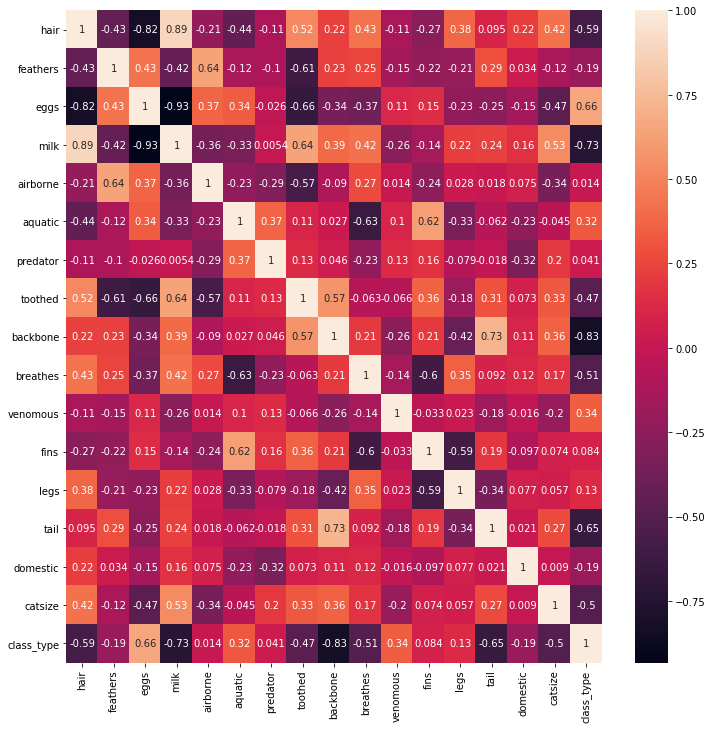

In [24]:
#Correlation matrix
plt.figure(figsize=(12, 12))
corr = DF.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [26]:
DF.class_type.value_counts() #count target feature 

1    38
2    18
4    11
7     9
6     7
5     4
3     4
Name: class_type, dtype: int64

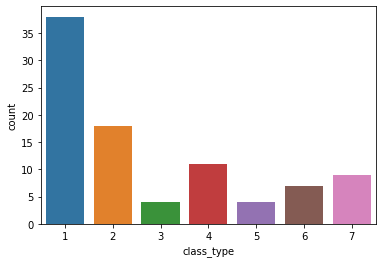

In [28]:
#count plot of target feature
sns.countplot(x='class_type', data = DF)
plt.show()

In [4]:
#split dataset in features and target variable

X=np.array(DF.drop(columns=["class_type"])) # Features
Y=np.array(DF["class_type"]) # Target variable

feature_cols = list(DF.columns)[:-1]
print(feature_cols)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [5]:
classes=np.unique(Y)
print(classes)

[1 2 3 4 5 6 7]


In [6]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Split dataset into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)


In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(Y_test, Y_pred),3))

Accuracy: 0.964


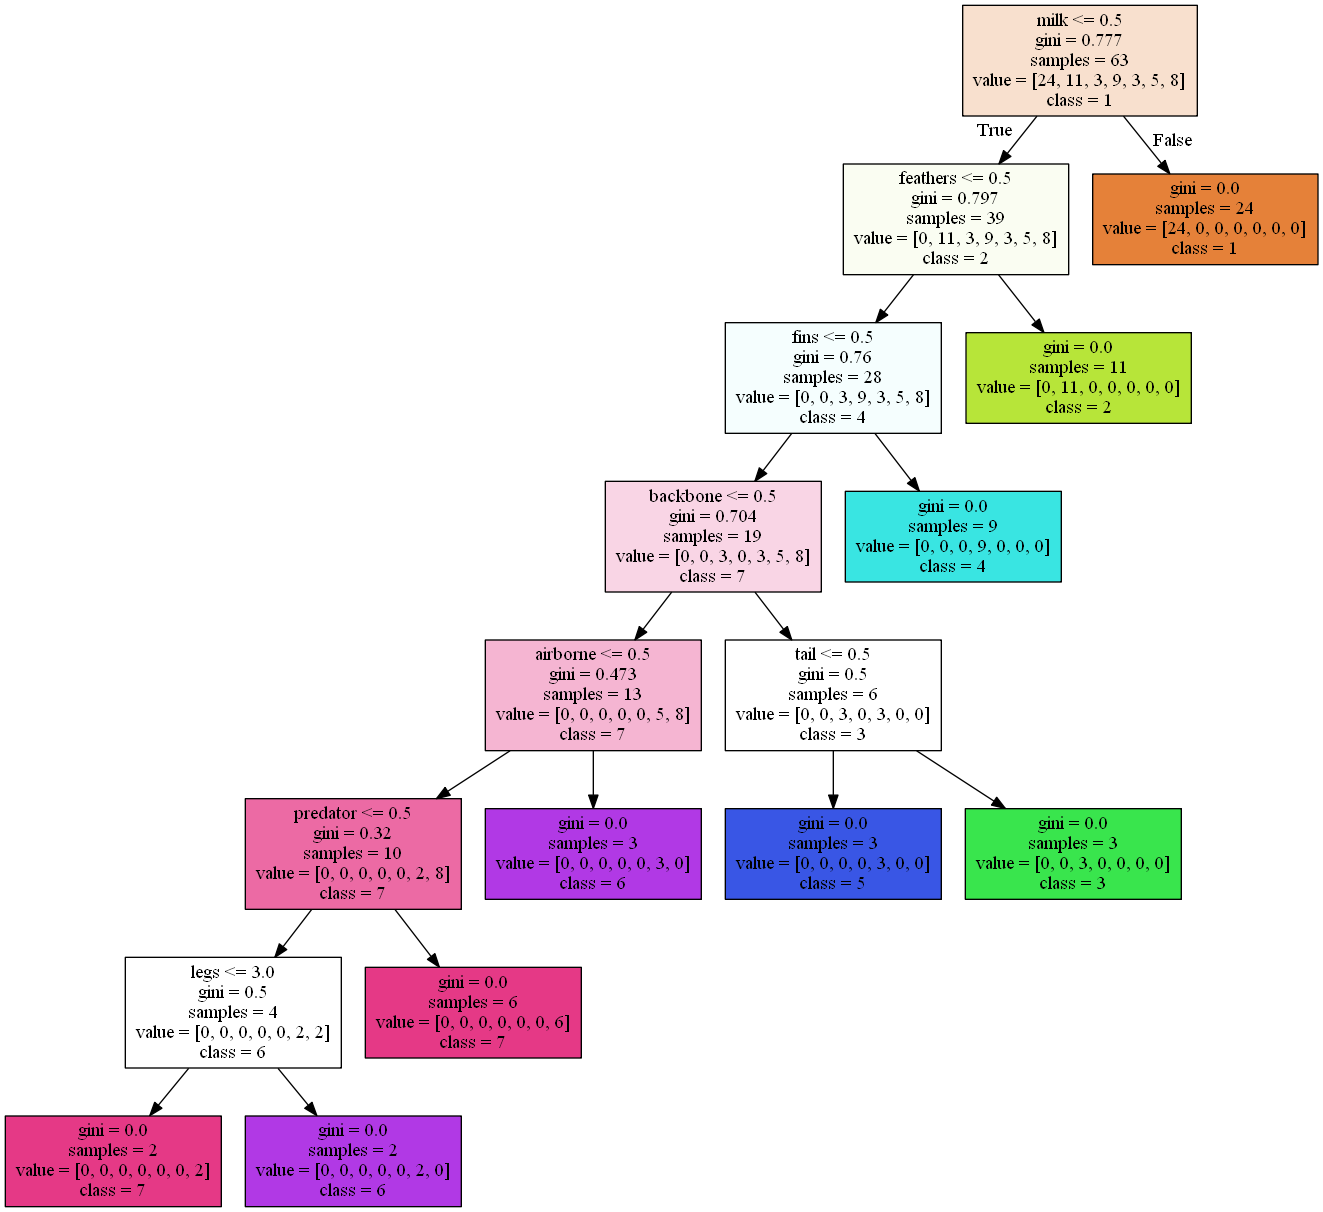

In [8]:
#Visualizing Decision Tree
import graphviz
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
dot=export_graphviz(clf,rotate=False,
                    filled=True,
                    feature_names=feature_cols,
                    class_names=[str(u) for u in classes]
                   )
g=pydotplus.graph_from_dot_data(dot)
Image(g.create_png())

In [9]:
DF2 = pd.read_csv("submission_zoo.csv")
DF2

,Unnamed: 0,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
1,1,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0
2,2,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
3,3,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1
4,4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
5,5,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
6,6,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
7,7,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
8,8,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0
9,9,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
